In [2]:
from google.colab import auth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import gspread
from google.auth import default
import pandas as pd



In [3]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [4]:
worksheet = gc.open('ex1').sheet1
data=worksheet.get_all_values()




In [5]:
dataset1=pd.DataFrame(data[1:],columns=data[0])
dataset1=dataset1.astype({'input':'float'})
dataset1=dataset1.astype({'output':'float'})

In [6]:
dataset1.head()

,input,output
0,3.0,6.0
1,6.0,5.0
2,7.0,7.0
3,8.0,6.0
4,9.0,7.0


In [7]:
x=dataset1[['input']].values
y=dataset1[['output']].values


In [8]:
x

array([[ 3.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [45.],
       [ 6.],
       [ 8.],
       [ 9.],
       [34.],
       [12.],
       [ 3.],
       [ 4.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 2.],
       [ 3.],
       [ 9.]])

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [10]:
Scaler=MinMaxScaler()

In [11]:
Scaler.fit(x_train)

MinMaxScaler()

MinMaxScaler()

In [13]:
x_train1=Scaler.transform(x_train)

In [14]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [15]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [16]:
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 811ms/step - loss: 483.2301
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 482.7322
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 482.3684
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 482.0711
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 481.8072
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 481.5760
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 481.3635
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 481.1765
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 481.0107
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 480.8539
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 480.6993
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 480.5460
Epoch 13/2000
1/1 [

In [17]:
loss_dataset1=pd.DataFrame(ai_brain.history.history)


<Axes: >

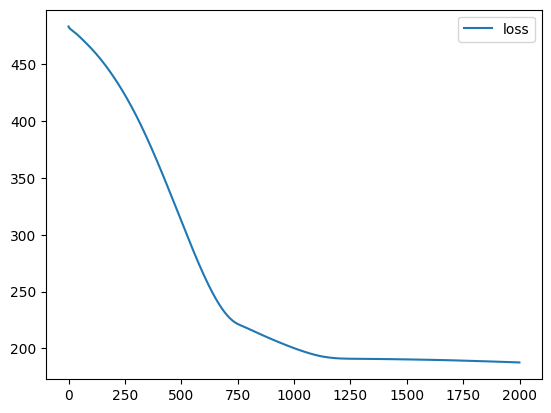

In [18]:

loss_dataset1.plot()

In [19]:
x_n1 = [[30]]

In [ ]:
x_n1_1 = Scaler.transform(x_n1)

In [ ]:
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 92ms/step


array([[37.311577]], dtype=float32)